In [54]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc
from scipy.spatial.distance import euclidean
import os
import sounddevice as sd

In [55]:
def get_wav_files(folder_path):
    """
    Lấy danh sách các tệp WAV trong thư mục và các thư mục con.
    """
    wav_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".wav"):
                wav_files.append(os.path.join(root, file))
    return wav_files

numOfCoef = 21
# List paths NguyenAmHuanLuyen
base_audio_train_folder = "NguyenAmHuanLuyen-16k"
audio_train_folders = [os.path.join(base_audio_train_folder, file) for file in os.listdir(base_audio_train_folder)]
file_paths = []

for folder in audio_train_folders:
    file_paths.append(get_wav_files(folder))

# List paths NguyenAmKiemThu
detect_vowel_paths = []
base_audio_test_folder = "NguyenAmKiemThu-16k"
audio_test_folders = [os.path.join(base_audio_test_folder, file) for file in os.listdir(base_audio_test_folder)]

for folder in audio_test_folders:
    detect_vowel_paths.append(get_wav_files(folder))

print(file_paths)
print(detect_vowel_paths)
print(len(file_paths))
print(len(detect_vowel_paths))

[['NguyenAmHuanLuyen-16k/43MNT/i.wav', 'NguyenAmHuanLuyen-16k/43MNT/o.wav', 'NguyenAmHuanLuyen-16k/43MNT/a.wav', 'NguyenAmHuanLuyen-16k/43MNT/u.wav', 'NguyenAmHuanLuyen-16k/43MNT/e.wav'], ['NguyenAmHuanLuyen-16k/34MQP/i.wav', 'NguyenAmHuanLuyen-16k/34MQP/o.wav', 'NguyenAmHuanLuyen-16k/34MQP/a.wav', 'NguyenAmHuanLuyen-16k/34MQP/u.wav', 'NguyenAmHuanLuyen-16k/34MQP/e.wav'], ['NguyenAmHuanLuyen-16k/36MAQ/i.wav', 'NguyenAmHuanLuyen-16k/36MAQ/o.wav', 'NguyenAmHuanLuyen-16k/36MAQ/a.wav', 'NguyenAmHuanLuyen-16k/36MAQ/u.wav', 'NguyenAmHuanLuyen-16k/36MAQ/e.wav'], ['NguyenAmHuanLuyen-16k/44MTT/i.wav', 'NguyenAmHuanLuyen-16k/44MTT/o.wav', 'NguyenAmHuanLuyen-16k/44MTT/a.wav', 'NguyenAmHuanLuyen-16k/44MTT/u.wav', 'NguyenAmHuanLuyen-16k/44MTT/e.wav'], ['NguyenAmHuanLuyen-16k/33MHP/i.wav', 'NguyenAmHuanLuyen-16k/33MHP/o.wav', 'NguyenAmHuanLuyen-16k/33MHP/a.wav', 'NguyenAmHuanLuyen-16k/33MHP/u.wav', 'NguyenAmHuanLuyen-16k/33MHP/e.wav'], ['NguyenAmHuanLuyen-16k/37MDS/i.wav', 'NguyenAmHuanLuyen-16k/37M

In [89]:


"""" MEL SPECTROGRAM AND ORIGINAL PLOT """

def plot_mel_spectrogram(y, sr, n_fft=256, hop_length=64, n_mels=128):
    # Compute the mel spectrogram
    # mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    mel_spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Convert to dB scale
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Plot the Mel spectrogram
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='linear', sr=sr, hop_length=hop_length, cmap='jet')
    plt.colorbar(format='%+2.0f dB')

    time = np.arange(0, len(y)) / sr
    print("time:", max(time))
    # Set axis labels and title
    plt.xlabel('Time (s)')
    plt.xticks(np.arange(0, max(time), 0.2))
    plt.ylabel('Mel Frequency')
    plt.title('Mel Spectrogram')

    plt.tight_layout()
    plt.show()


def plot_original_audio(y, sr, title='Original Audio', time_division=0.2):
    plt.figure(figsize=(12, 4))
    time = np.arange(0, len(y)) / sr
    plt.plot(time, y)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xticks(np.arange(0, max(time), time_division))
    plt.show()


def compare_audio_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path)

    # Plot Mel Spectrogram
    plot_mel_spectrogram(y, sr, title='Mel Spectrogram')

    # Plot MFCCs
    plot_original_audio(y, sr)



time: 1.7732879818594105


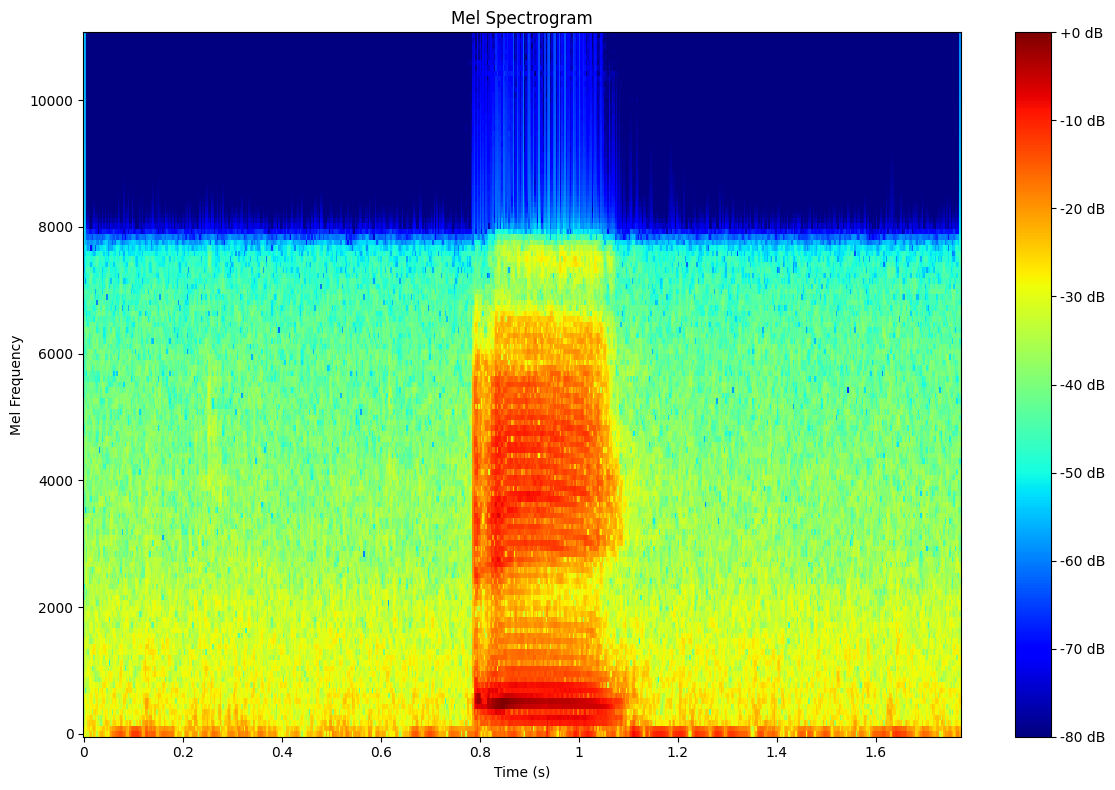

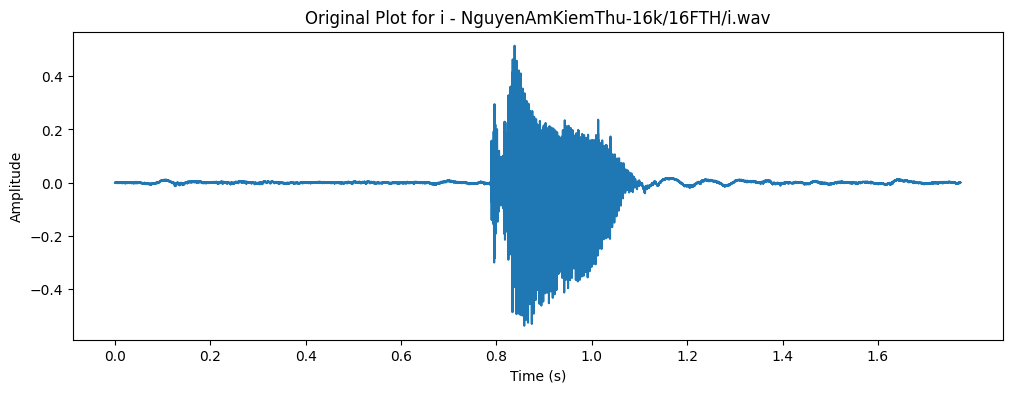

time: 2.009705215419501


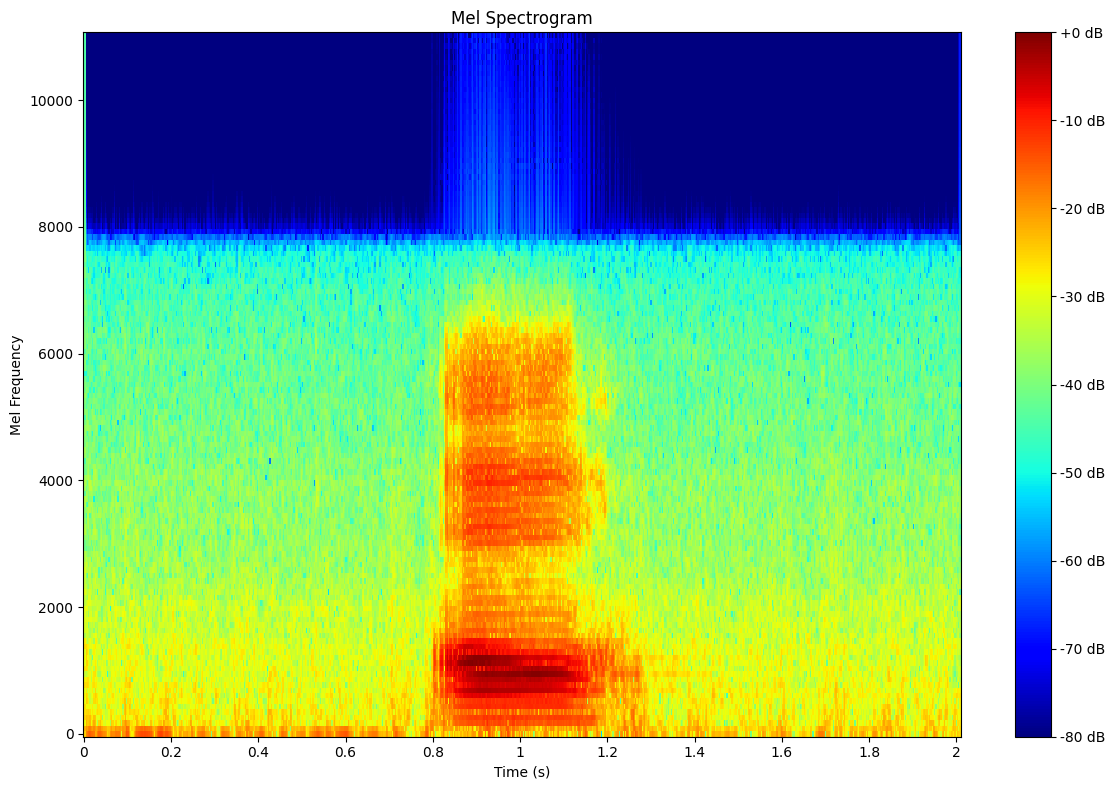

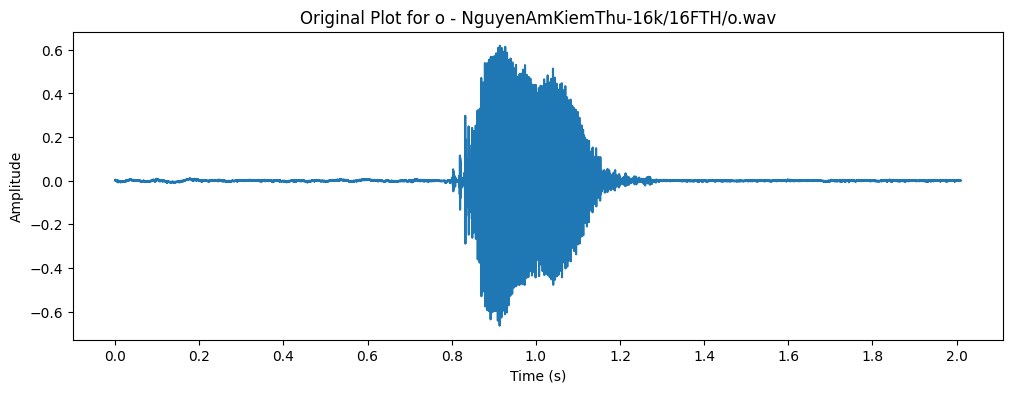

time: 2.1043083900226756


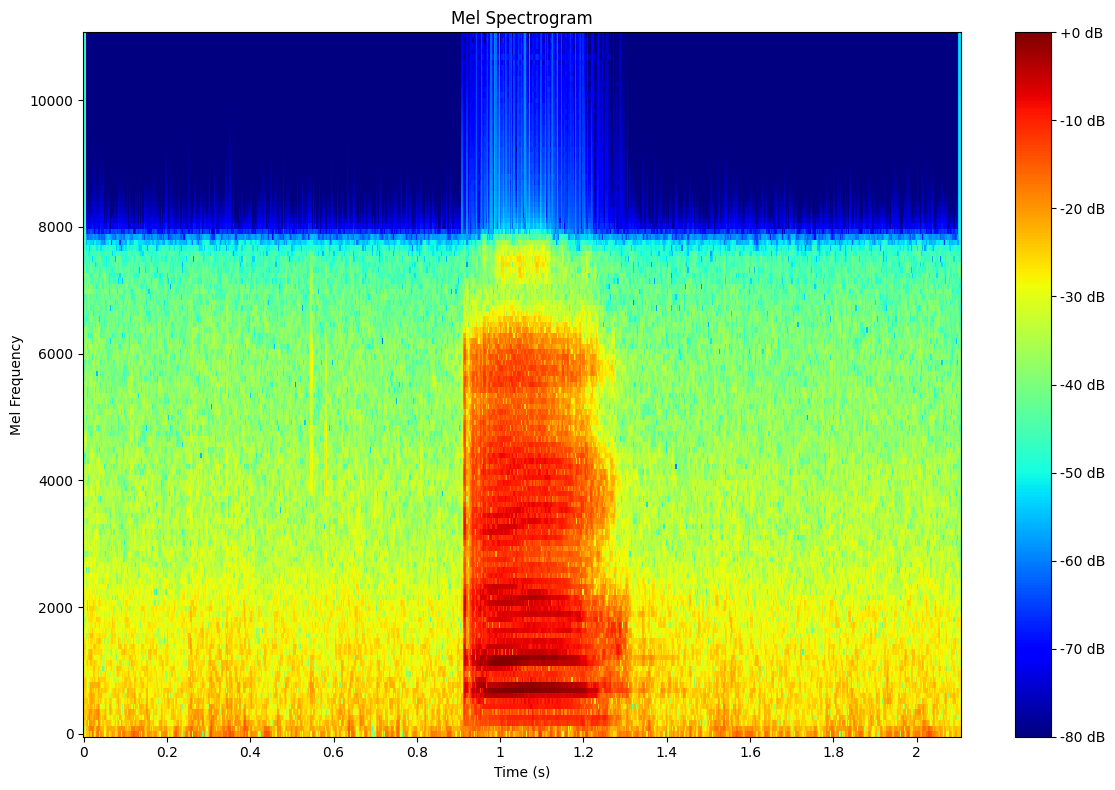

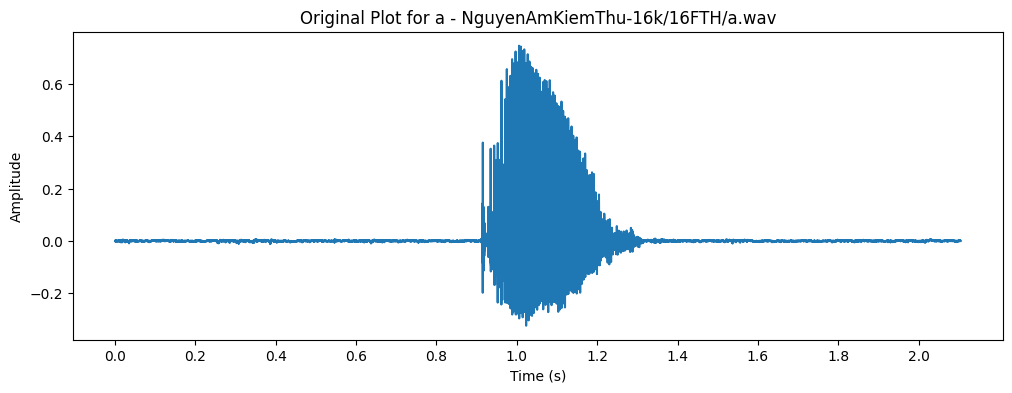

time: 2.1043083900226756


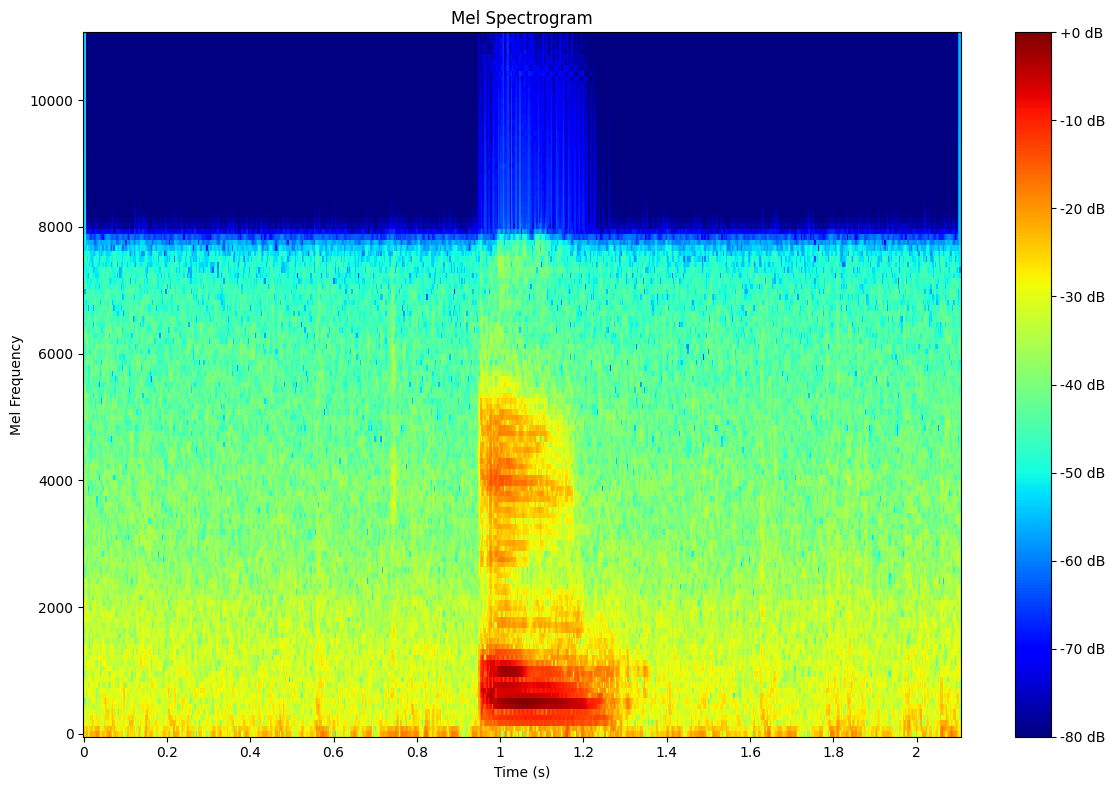

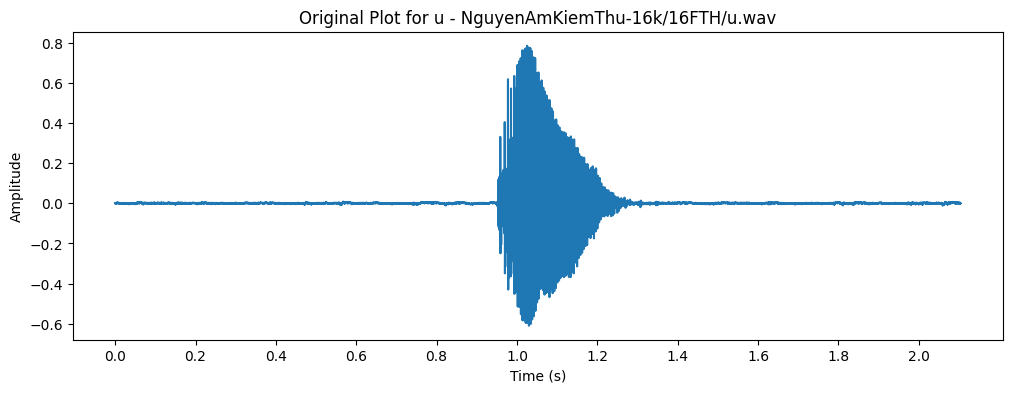

time: 1.986122448979592


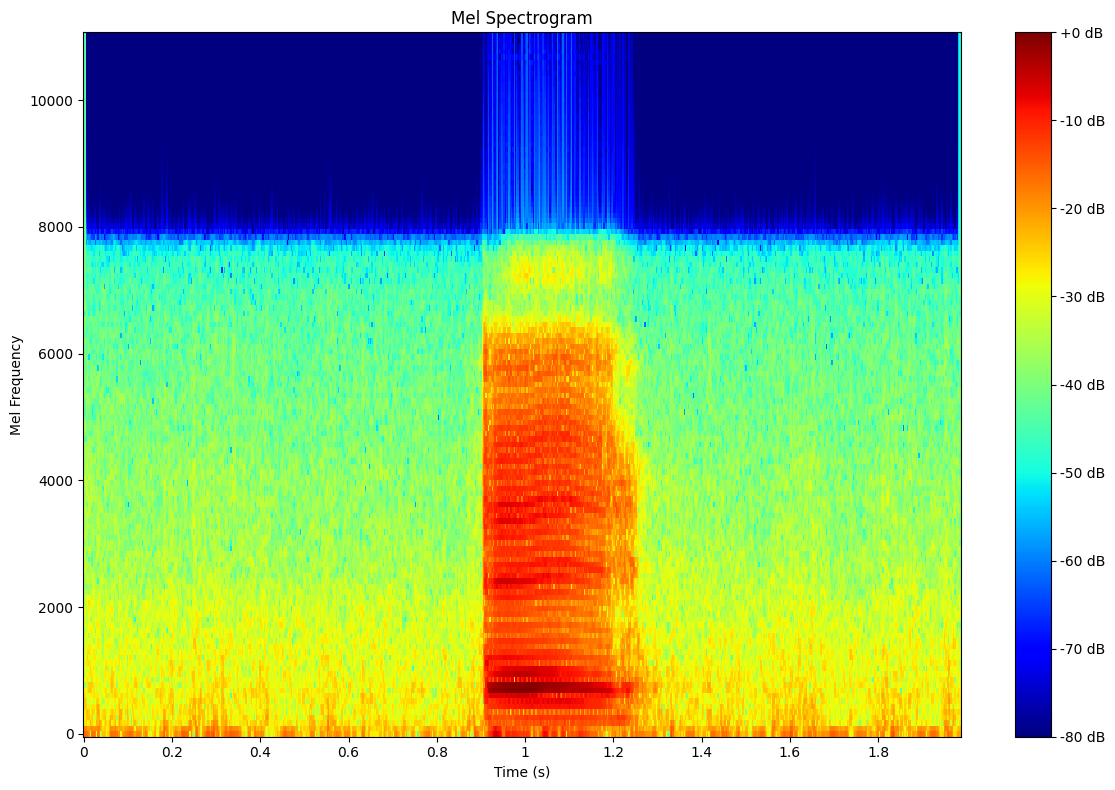

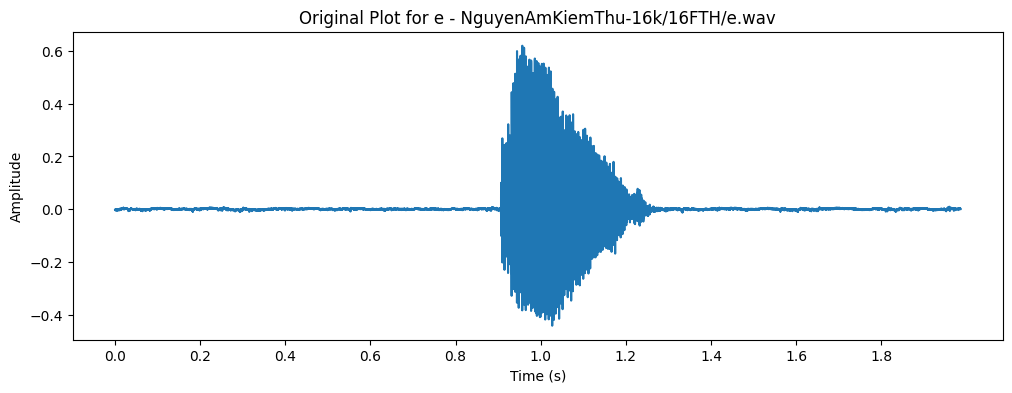

In [90]:
vowels_file = []
dict_label_vowels = {}
for item in detect_vowel_paths[1]:
    label = (item.split('.')[0]).split('/')[2]

    dict_label_vowels[label] = item
    #{
    # 'i': 'file_path'
    # }
vowels_file.append(dict_label_vowels)
# plt.figure(figsize=(20,10))

# extract and plot Mel spectrogram for ech vowel
for vowel, file_path in dict_label_vowels.items():
    # load the audio file
    y, sr = librosa.load(file_path)
    # Plot Mel Spectrogram
    plot_mel_spectrogram(y, sr)
    
    plot_original_audio(y, sr, title=f'Original Plot for {vowel} - {file_path}')
    


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

from scipy.signal import get_window
import librosa

# Function to convert frequency to Mel scale
def freq_to_mel(freq):
    return 2595 * np.log10(1 + freq / 700)

# Function to convert Mel to frequency
def mel_to_freq(mels):
    return 700 * (10**(mels / 2595) - 1)

# Function to create a bank of mel filters
def mel_filter_bank(sr, n_fft, n_mels=128):
    mel_min = freq_to_mel(0)
    mel_max = freq_to_mel(sr / 2)
    mels = np.linspace(mel_min, mel_max, n_mels + 2)
    freqs = mel_to_freq(mels)
    points = np.floor((n_fft + 1) * freqs / sr).astype(int)
    filters = np.zeros((n_mels, n_fft // 2 + 1))
    for i in range(1, n_mels + 1):
        filters[i - 1, points[i - 1]: points[i]] = (np.arange(points[i - 1], points[i]) - points[i - 1]) / (points[i] - points[i - 1])
        filters[i - 1, points[i]: points[i + 1]] = 1 - ((np.arange(points[i], points[i + 1]) - points[i]) / (points[i + 1] - points[i]))
    return filters

# Custom function to create a Mel spectrogram
def custom_mel_spectrogram(y, sr, n_fft=2048, hop_length=512, n_mels=128):
    # Create a Hann window
    window = get_window('hann', n_fft)

    # Number of frames/spectrograms
    n_frames = 1 + (len(y) - n_fft) // hop_length

    # Create empty array to fill with spectrogram data
    mel_spectrogram = np.zeros((n_mels, n_frames))

    # Calculate Mel filter bank
    mel_filters = mel_filter_bank(sr, n_fft, n_mels)

    for i in range(n_frames):
        # Get a frame and apply window
        frame = y[i*hop_length : i*hop_length + n_fft] * window

        # Compute the magnitude spectrum via FFT
        magnitude_spectrum = np.abs(fft(frame)[:n_fft // 2 + 1])

        # Apply the mel filter bank
        mel_energy = np.dot(mel_filters, magnitude_spectrum)

        # Convert to decibels
        mel_spectrogram[:, i] = 20 * np.log10(np.maximum(mel_energy, 1e-16))

    return mel_spectrogram

# Plotting function
def plot_custom_mel_spectrogram(y, sr, title='Mel Spectrogram'):
    mel_spectrogram_db = custom_mel_spectrogram(y, sr)
    plt.figure(figsize=(12, 4))
    plt.imshow(mel_spectrogram_db, aspect='auto', origin='lower', 
               extent=[0, len(y)/sr, 0, sr/2], cmap='viridis')

    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

def plot_original_audio(y, sr, title='Original Audio', time_division=0.5):
    plt.figure(figsize=(10, 4))
    time = np.arange(0, len(y)) / sr
    plt.plot(time, y)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xticks(np.arange(0, max(time), time_division))
    plt.show()

def plot_vector_line(y, sr, n_fft=2048, hop_length=512):
    # Compute the complex spectrogram
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    
    # Calculate magnitude and phase
    magnitude = np.abs(D)
    phase = np.angle(D)

    # Calculate vectors from magnitude and phase
    vectors = magnitude * np.exp(1j * phase)

    
    # Flatten the vectors for line plotting
    flat_vectors = np.concatenate([np.real(vectors).flatten(), np.imag(vectors).flatten()])

    # Create time axis
    time_axis = np.arange(0, y.shape[0] / sr, (y.shape[0] / sr)/flat_vectors.shape[0])

    print(flat_vectors.shape[0])
    print(time_axis)
    print(flat_vectors)
    print(len(time_axis))
    print(len(flat_vectors))
    # Plot vector line
    plt.figure(figsize=(12, 8))
    plt.plot(time_axis, flat_vectors, color='b', alpha=0.7)
    plt.title('Vector Line Plot')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()


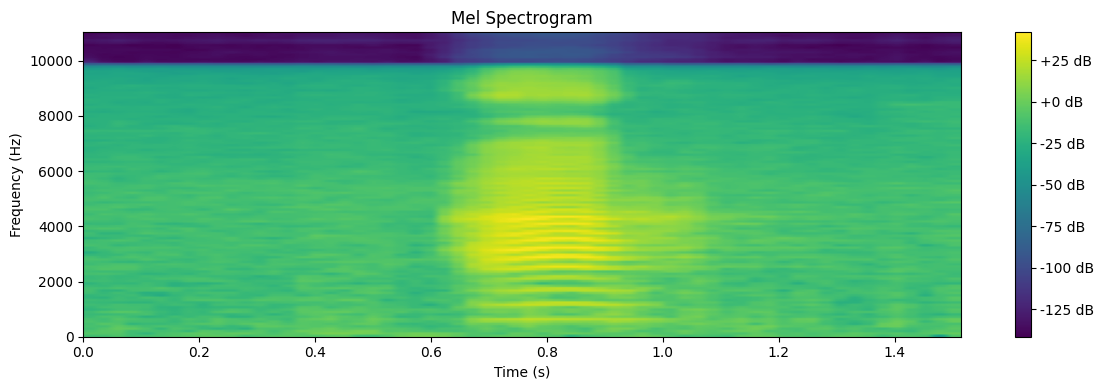

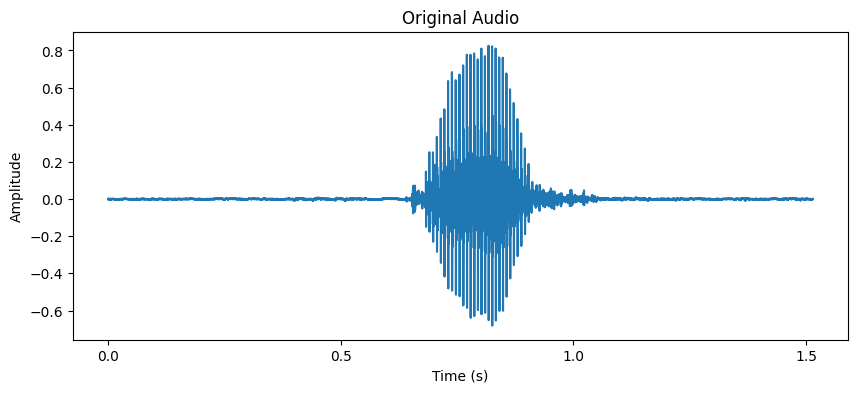

In [48]:
y, sr = librosa.load('/Users/lequangnhat/My Study/4-Signal-Processing/test/NguyenAmHuanLuyen-16k/40MHS/a.wav') # Replace with your audio file and sampling rate

plot_custom_mel_spectrogram(y, sr)
plot_original_audio(y, sr)
